# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
  # Calculate the mean of each column
  X_mean = np.mean(X_train, axis=0)

  # Center the data
  X_train_centered = X_train - X_mean
  X_test_centered = X_test - X_mean

  # Calculate the covariance matrix
  covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

  # Calculate eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]

  # Select the top n_components eigenvectors
  U = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  X_train_svd = np.dot(X_train_centered, U)
  X_test_svd = np.dot(X_test_centered, U)

  return X_train_svd, X_test_svd, U

## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
svd_components = [10, 25, 50, 75, 100, 125, 150, 200, 300, 400, 500, 784]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        'n_components': n_components,  # Number of SVD components used
        'accuracy': accuracy,  # Model accuracy on the test data
        'training_time': training_time  # Time taken to train the model
    })
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


# Print the results
for result in results:
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 2.1841 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8855, Training time: 6.2475 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 15.7542 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.9152, Training time: 28.9437 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 49.4245 seconds
Applying custom SVD with 125 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 125, Accuracy: 0.9191, Training time: 65.8256 seconds
Applying custom SVD with 150 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9197, Training time: 72.1755 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 101.2763 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9206, Training time: 170.6306 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9196, Training time: 293.5518 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 358.4180 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 593.5496 seconds
SVD components: 10, Accuracy: 0.8035, Training time: 2.1841 seconds
SVD components: 25, Accuracy: 0.8855, Training time: 6.2475 seconds
SVD components: 50, Accuracy: 0.9080, Training time: 15.7542 seconds
SVD components: 75, Accuracy: 0.9152, Training time: 28.9437 seconds
SVD components: 100, Accuracy: 0.9181, Training time: 49.4245 seconds
SVD components: 125, Accuracy: 0.9191, Training time: 65.8256 seconds
SVD components: 150, Accuracy: 0.9197, Training time: 72.1755 seconds
SVD components: 200, Accuracy: 0.9206, Training time: 101.2763 seconds
SVD components: 300, Accuracy: 0.9206, Training time: 170.6306 seconds
SVD components: 400, Accuracy: 0.9196, Training time: 293.5518 seconds
SVD components: 500, Accuracy: 0.9205, Training time: 358.4180 seconds
SVD components: 784, Accuracy: 0.9207, Training time: 593.5496 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


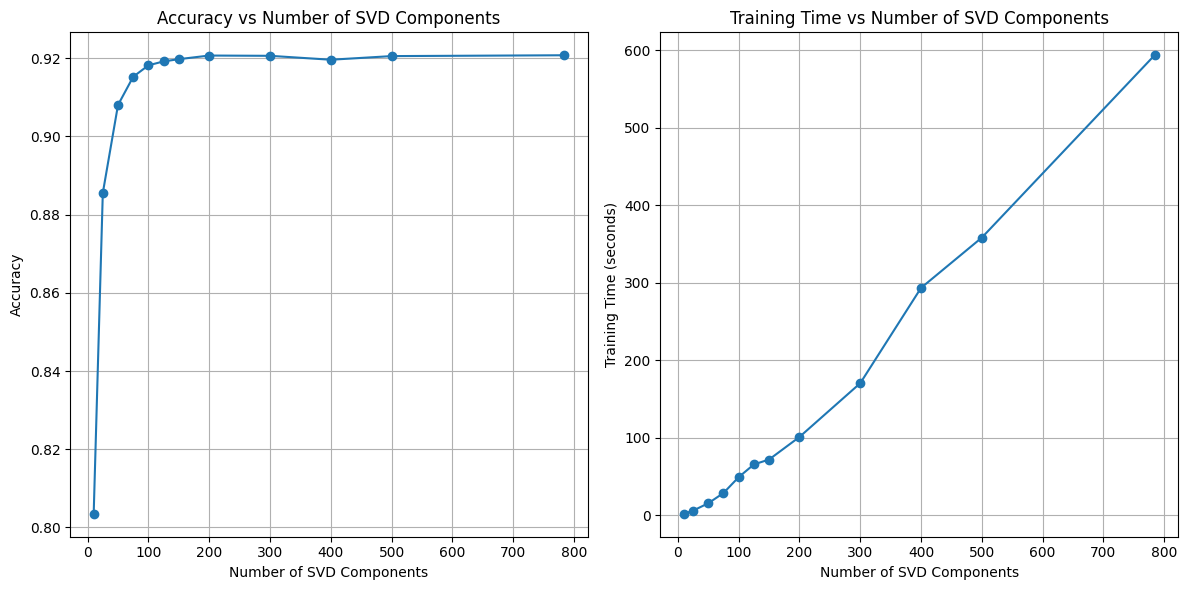

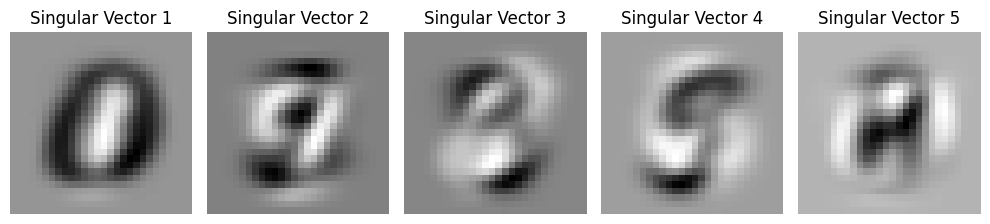

In [12]:
  # Extract accuracy and training time data
# Plot accuracy and training time vs. number of SVD components
components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the top 5 singular vectors as 28x28 images
X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(U[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Singular Vector {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

**Accuracy VS Number of SVD Components:** There is a significant increase in the accuracy when the number of SVD components increase up to a 100, and becomes stable, which means that after 100 components, adding more dimensions provides less improvement in accuracy.

**Training Time:** We can see that the training time significantly increases as the number of components increase, and beyond 100 components, the training time increases sharply without much gain in accuracy.

**Optimal SVD Component Range:** We can say that a 100 components is where the balance between high accuracy and reasonable training timen is held, as the accuracy difference between a 100 components and 200 components is really small.

**Conclusion:** 100 components provides the best trade-off between accuracy and training time. It offers a significant reduction in training time compared to 200+ components while maintaining almost the same accuracy.
